# 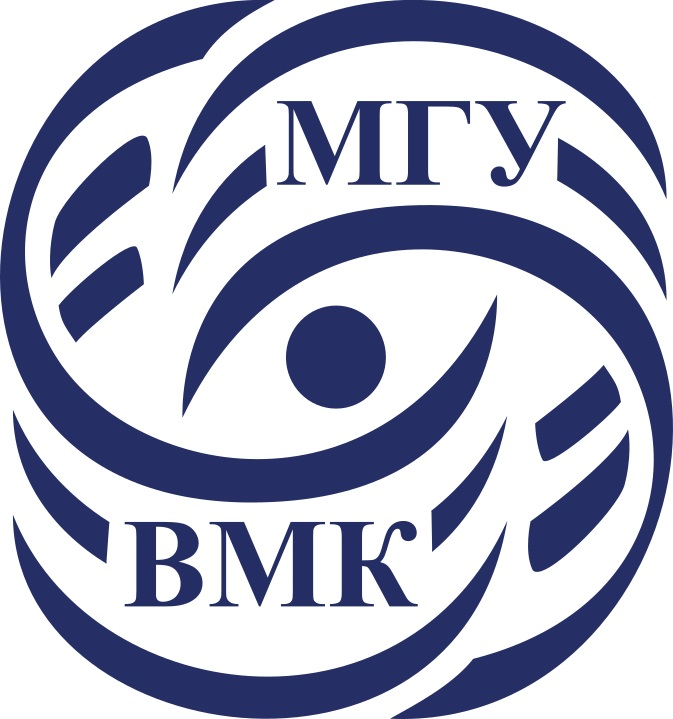

# Машинное обучение. ВМК МГУ

# Практическое задание 3: Линейные модели: регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Понять, чем отличаются разные регуляризаторы;
* Научиться решать задачу регрессии линейными моделями.
-------
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 7 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [45]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: c:\Users\user\3_cours\ML_3_cours\6_hometask\requirements_2024_25_for_colab_small.txt

  0%|          | 0.00/375 [00:00<?, ?B/s]
100%|██████████| 375/375 [00:00<?, ?B/s] 


Проверим версию библиотеки:

In [46]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Линейная регрессия и регуляризация

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

В модели линейной регрессии с $l_2$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \frac{\alpha}{2} \cdot \left( w_1^2 + \dots + w_n^2 \right) \rightarrow \min_{w_1, \dots, w_n, b}$

В модели линейной регрессии с $l_1$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \alpha \cdot \left( |w_1| + \dots + |w_n| \right) \rightarrow \min_{w_1, \dots, w_n, b}$

### <font color='DarkOrange'>**Задание 1 [1 балл]**</font>

Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции. Возможно вам также поможет картика из базовой части

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Коэффициент b не связан с каким либо признаком и не отражает важность или вес признака. Он корректирует предсказание на определенное смещение(сдвигает модель по вертикали, не влияя на наклон).

Смещение не масштабирует признак(смещает ответ).Так, регуляризация предназначена для уменьшения влияния отдельных признаков на ответ, чтобы предотвратить переобучение.

Резуляризация коэффициента b привела бы  к неестественному смещению предсказаний, особенно если бы штарф регулязации был бы большой. Таким образом, прогнозы могут стать систематически смещенными, что не всегда желательно.

-----
<font color="white" style="opacity:0.2023"></font>

Рассмотрим модель линейной регрессии с $l_2$ регуляризацией. В sklearn эта модель реализована посредством класса Ridge. В нём есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Сгенерируем случайные данные. Пусть $x$ будет обычным числом из равномерного распределения, а $𝑦=0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim N(0, 0.01)$. Добавим в данные к переменной $x$ её же умноженную на $3$. То есть, теперь у нас два признака $x_1$ и $x_2 = 3 \cdot x_1$.

Поскольку  $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{6} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. То, как мы могли убедиться в базовой части, без регуляризации есть риск выучить очень большие веса.

Посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [48]:
from sklearn.linear_model import Ridge

In [49]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

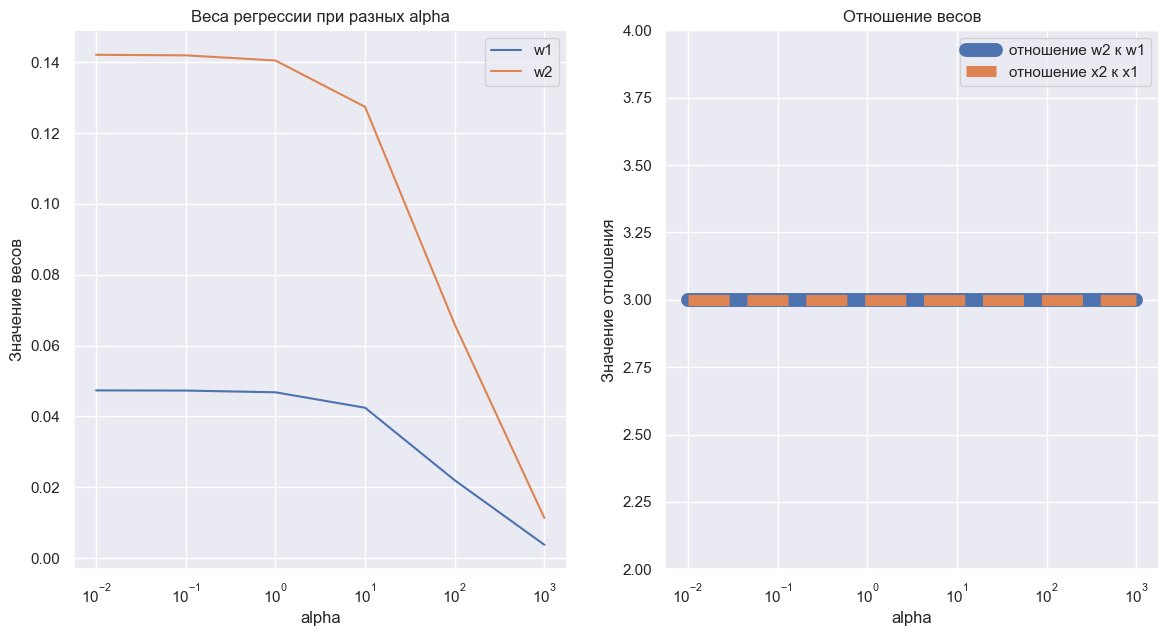

In [50]:
w1 = []
w2 = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X3, Y3)
    w1.append(reg.coef_[0])
    w2.append(reg.coef_[1])

w1 = np.array(w1)
w2 = np.array(w2)

fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].plot(alphas, w1, label="w1")
axs[0].plot(alphas, w2, label="w2")
axs[0].set_xscale("log")
axs[0].set_title("Веса регрессии при разных alpha")
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Значение весов")
axs[0].legend()
axs[1].plot(alphas, w2 / w1, label="отношение w2 к w1", linewidth=10)
axs[1].plot([0.01, 1000], [3, 3], label="отношение x2 к x1", linestyle="--", linewidth=8)
axs[1].set_xscale("log")
axs[1].set_ylim(2,4)
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Значение отношения")
axs[1].set_title("Отношение весов")
axs[1].legend()
plt.show()

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>

Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

$J(w) = \sum_{i=1}^{n} (y_i - (w_1 x_{1i} + w_2 x_{2i}))^2 + \alpha (w_1^2 + w_2^2)$

где:
- $w_1, w_2$ - веса модели,
- $x_{1i}, x_{2i}$ - признаки модели для i-го наблюдения,
- $y_i$ - истинные значения целевой переменной для i-го наблюдения,
- $\alpha$ - параметр регуляризации.

Производные по весам:

$\frac{\partial J}{\partial w_1} = -2 \sum_{i=1}^{n} x_{1i} (y_i - (w_1 x_{1i} + w_2 x_{2i})) + 2 \alpha w_1 = 0$

$\frac{\partial J}{\partial w_2} = -2 \sum_{i=1}^{n} x_{2i} (y_i - (w_1 x_{1i} + w_2 x_{2i})) + 2 \alpha w_2 = 0$

Дано: $x_1$ и $x_2 = 3 \cdot x_1$

Подставим:

$\frac{\partial J}{\partial w_1} = -2 \sum_{i=1}^{n} x_{1i} (y_i - (w_1 x_{1i} + 3 w_2 x_{1i})) + 2 \alpha w_1 = 0$

$\frac{\partial J}{\partial w_2} = -2 \sum_{i=1}^{n} 3 x_{1i} (y_i - (w_1 x_{1i} + 3 w_2 x_{1i})) + 2 \alpha w_2 = 0$

Преобразуем:

$\frac{\partial J}{\partial w_1} = -2 \sum_{i=1}^{n} 3 x_{1i} (y_i - (w_1 x_{1i} + 3 w_2 x_{1i})) + 2 \alpha w_1 = 0$

$\frac{\partial J}{\partial w_2} = -2 \sum_{i=1}^{n} 3 x_{1i} (y_i - (w_1 x_{1i} + 3 w_2 x_{1i})) + 2 \alpha w_2 = 0$


$6 \alpha w_1 - 2 \alpha w_2= 0$

Так как все признки линейно зависимы между собой, отношение $w_2/w_1$  не зависимо от значения $\alpha$


Значит отношение весов стремится к отношению коэффициентов при признаках ->
  $x_2$ / $x_1$ -> 3

  $w_2 = 3w_1$

Значит отношение между весами постоянно

-----
<font color="white" style="opacity:0.2023"></font>

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

### <font color='DarkOrange'>**Задание 3 [2 баллa]**</font>

Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Функция потерь Lasso:

$J(w) = \sum_{i=1}^{n} (y_i - (w_1 x_{1i} + w_2 x_{2i}))^2 + \alpha (|w_1| + |w_2|)$

где:
- $w_1, w_2$ — веса модели,
- $x_{1i}, x_{2i}$ — признаки модели для i-го наблюдения,
- $y_i$ — истинные значения целевой переменной для i-го наблюдения,
- $\alpha$ — параметр регуляризации.

В точке 0 прозводнная не определена (т.к модуль)

Градиентный спуск пытается минимизировать функцию потерь, он может заменить веса непосредственно на 0, если соответствующий вклад в функцию потерь меньше $\alpha$

Дано: $x_1$ и $x_2 = 3 \cdot x_1$

$L = \frac{1}{2} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + w_2 \cdot 3x_{i1} + b - y_i)^2 + {\alpha}\cdot \left( |w_1| + |w_2|\right)$


$\frac{\partial J}{\partial w_1} = ∑_{i=1}^M (w_1 \cdot x_{i1} + w_2 \cdot 3x_{i1} + b - y_i) \cdot x_{i1}+ {\alpha}\cdot sign(w_1) = 0$

$\frac{\partial J}{\partial w_2} = ∑_{i=1}^M (w_1 \cdot x_{i1} + w_2 \cdot 3x_{i1} + b - y_i) \cdot 3x_{i1}+ {\alpha}\cdot sign(w_2)= 0$

При использовании L1 - регулязации для линейно зависимых признаков приведет к тому, что алгоритм возьмет один из признаков и установит значение его веса -  не равным 0, а для другого пизнака вес - равный 0. Это поможет определить наиболее важные признаки. 

Если вес $w_i$ большой,  влияние регуляризации $\alpha \cdot sign(w_i)$ будет маленькое, так как ошибка $\frac{\partial L}{\partial w_i}$ более значительна.

-----

Добавим $l_1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [51]:
from sklearn.linear_model import Lasso

In [52]:
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.029684463509327023

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.14506160917248503

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.15659932373880084

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.15775309519543249

Веса, при alpha = 0.00001
w1: 0.396687319914549 	w2: 0.025639365702912652



### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

<font color='LightSteelBlue'>**Подсказка**</font>

 Обратите внимание на то, каким странным получился вес $w_2$

<font color='MediumOrchid'>**Ваши выводы тут:**</font>


1. Схожесть с обычной линейной регрессией: При малом $\alpha$ модель становится менее чувствительной к штрафу за ненулевые веса, и в результате веса могут приниматься большими значениями для минимизации ошибки предсказания.

2. Проблемы с переобучением: Если $\alpha$ слишком мал, модель может начать подстраиваться под шум в данных, что приводит к переобучению.

3. Проверка завершения обучения: Чтобы проверить, завершился ли процесс обучения до достижения максимального количества итераций, используется атрибут n_iter_ у объекта Lasso. Этот атрибут показывает, сколько итераций было выполнено во время оптимизации. Если n_iter_ достигает максимального значения итераций, указанного в параметре max_iter, это может указывать на то, что модель не смогла достичь сходимости.

При $\alpha = 0.00001$, модель совершила максимальное количество итераций (1000) -> модель не смогла достичь сходимости


In [53]:
#Ваш код здесь
alphas = [1., 0.1, 0.01, 0.001, 0.0001, 0.00001]

for alpha in alphas:
    reg = Lasso(alpha=alpha, max_iter=1000, tol=1e-4)
    reg.fit(X3, Y3)
    print("Веса при alpha = ",alpha)
    print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
    print("Число итераций:", reg.n_iter_)
    print("Максимальное число итераций:", reg.max_iter)
    print()

Веса при alpha =  1.0
w1: 0.0 	w2: 0.0
Число итераций: 1
Максимальное число итераций: 1000

Веса при alpha =  0.1
w1: 0.0 	w2: 0.029684463509327023
Число итераций: 2
Максимальное число итераций: 1000

Веса при alpha =  0.01
w1: 0.0 	w2: 0.14506160917248503
Число итераций: 7
Максимальное число итераций: 1000

Веса при alpha =  0.001
w1: 0.0 	w2: 0.15659932373880084
Число итераций: 63
Максимальное число итераций: 1000

Веса при alpha =  0.0001
w1: 0.0 	w2: 0.15775309519543249
Число итераций: 617
Максимальное число итераций: 1000

Веса при alpha =  1e-05
w1: 0.396687319914549 	w2: 0.025639365702912652
Число итераций: 1000
Максимальное число итераций: 1000



-----

В предущих блоках мы использовали модельные примеры, в которых $y$ зависел от $x$ линейно. Но так бывает далеко не всегда.

### <font color='DarkOrange'>**Задание 5 [1 баллa]**</font>

 Придумайте, сгенерируйте и визуализируйте пример, в котором линейная регрессия будет плохо классифицировать данные.

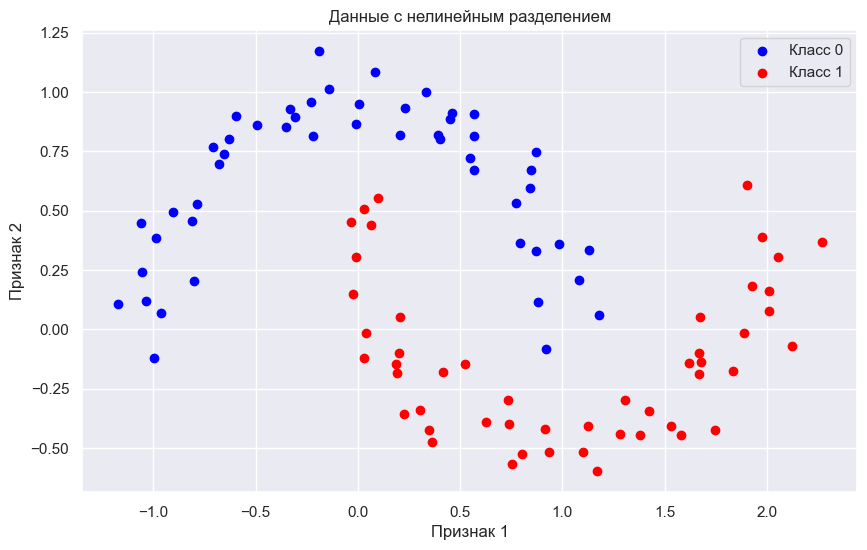

In [54]:
#Ваш код здесь
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Класс 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Класс 1')
plt.title('Данные с нелинейным разделением')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()


### <font color='DarkOrange'>**Задание 6 [2 баллa]**</font>

Приведите искусственный пример (можно даже очень неправдоподобный), когда линейная регрессия с $l_2$ регуляризацией гарантированно занулит какой-нибудь признак? Покажите (теоретически или программно), что признак действительно зануляется


In [55]:
# ваш код здесь
import numpy as np
from sklearn.linear_model import Ridge

np.random.seed(0)

X1 = np.random.rand(100)
X2 = 2 * X1 + np.random.normal(0, 0.1, 100)

X = np.vstack((X1, X2)).T

y = 3 * X1 + 1 + np.random.normal(0, 0.1, 100)

for i in range(100, 1000, 100):
    ridge_reg = Ridge(alpha=i)
    ridge_reg.fit(X, y)
    print(f"Коэффициенты модели: при alpha = {i}")
    print("w1:", ridge_reg.coef_[0], "\tw2:", ridge_reg.coef_[1])


Коэффициенты модели: при alpha = 100
w1: 0.1754380544478868 	w2: 0.34750504331848264
Коэффициенты модели: при alpha = 200
w1: 0.10262103699211547 	w2: 0.20417379903486013
Коэффициенты модели: при alpha = 300
w1: 0.07254131885611408 	w2: 0.14454169631877586
Коэффициенты модели: при alpha = 400
w1: 0.05610124139422716 	w2: 0.11186715433440182
Коэффициенты модели: при alpha = 500
w1: 0.04573688220902571 	w2: 0.09124104428963468
Коэффициенты модели: при alpha = 600
w1: 0.0386051651025274 	w2: 0.07703679440934441
Коэффициенты модели: при alpha = 700
w1: 0.03339764228234154 	w2: 0.06665931322030703
Коэффициенты модели: при alpha = 800
w1: 0.029428100469927065 	w2: 0.05874574930886611
Коэффициенты модели: при alpha = 900
w1: 0.026301965688305336 	w2: 0.052511720517871376


<font color='MediumOrchid'>**Ваши выводы тут:**</font>


1. Корреляция: Признаки $x_1$ и $x_2$ сильно коррелированы, что делает их избыточными для модели.

2. Регуляризация: При увеличении параметра регуляризации $\alpha$, модель стремится занулить один из коррелирующих признаков, чтобы избежать переобучения. В процессе коэффициенты будут уменьшаться, и один из них может оказаться равным нулю.


**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Когда линейные модели работают хорошо, а когда плохо

-----
<font color="white" style="opacity:0.2023"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.
